<a href="https://colab.research.google.com/github/mekiii/word2vec/blob/master/word_embeddings_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training a Word2Vec model with TED talk transcripts
## 1. Preprocessing TED talk transcripts
For the text preprocessing I am using the python libraries spacy and nltk. For the main word2vec-model-training I use the gensim library. 

First I am installing the packages.

In [2]:
!pip install --upgrade gensim
from gensim.models import Word2Vec
!pip install -q kaggle
import os
import csv
import pandas as pd
!pip install nltk
import nltk  
nltk.download('punkt')
!pip install spacy
!spacy download en_core_web_md
import spacy
nlp = spacy.load('en_core_web_sm', parse=True, tag=True, entity=True)
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer = ToktokTokenizer()
nltk.download('stopwords')
from time import time


Requirement already up-to-date: gensim in /usr/local/lib/python3.6/dist-packages (3.7.3)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


My text corpus of choice is the TED talk transcript in English. I am loading and unzipping this file from kaggle

In [0]:
os.environ['KAGGLE_USERNAME'] = "mekong"
os.environ['KAGGLE_KEY'] = "652943d9e4e316e26c0ccd0f825a249d"

In [4]:
!kaggle datasets download -d rounakbanik/ted-talks

 40% 5.00M/12.4M [00:00<00:00, 28.8MB/s]
100% 12.4M/12.4M [00:00<00:00, 49.2MB/s]


In [5]:
!unzip ted-talks.zip

Archive:  ted-talks.zip
  inflating: ted_main.csv            
  inflating: transcripts.csv         


In [6]:

df = pd.read_csv('transcripts.csv')
corpus = df.transcript
print(corpus[0])

Good morning. How are you?(Laughter)It's been great, hasn't it? I've been blown away by the whole thing. In fact, I'm leaving.(Laughter)There have been three themes running through the conference which are relevant to what I want to talk about. One is the extraordinary evidence of human creativity in all of the presentations that we've had and in all of the people here. Just the variety of it and the range of it. The second is that it's put us in a place where we have no idea what's going to happen, in terms of the future. No idea how this may play out.I have an interest in education. Actually, what I find is everybody has an interest in education. Don't you? I find this very interesting. If you're at a dinner party, and you say you work in education — Actually, you're not often at dinner parties, frankly.(Laughter)If you work in education, you're not asked.(Laughter)And you're never asked back, curiously. That's strange to me. But if you are, and you say to somebody, you know, they sa

In [7]:
!pip install contractions
from contractions import CONTRACTION_MAP

In [8]:
import re
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

expand_contractions("Y'all can't expand contractions I'd think")

'You all cannot expand contractions I would think'

In [9]:
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

remove_special_characters("Well this was fun! What do you think? 123#@!", 
                          remove_digits=True)

'Well this was fun What do you think '

In [10]:
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

lemmatize_text("My system keeps crashing! his crashed yesterday, ours crashes daily")

'My system keep crash ! his crashed yesterday , ours crash daily'

In [0]:
stopword_list = nltk.corpus.stopwords.words('english')

def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

remove_stopwords("The, and, if are stopwords, computer is not")

In [12]:
def remove_transcript_comments(text):
  pattern = '\(.*?\)'
  text = re.sub(pattern, '', text)
  return text

remove_transcript_comments("Hello (laughter!)!")

'Hello !'

In [13]:
for num, row in enumerate(corpus):
  corpus[num] = remove_transcript_comments(corpus[num])
  corpus[num] = expand_contractions(corpus[num])
  corpus[num] = remove_stopwords(corpus[num])
  print("Transcript nr" , num , "is preprocessed")
  
print(corpus[0])

Transcript nr 0 is preprocessed
Transcript nr 1 is preprocessed
Transcript nr 2 is preprocessed
Transcript nr 3 is preprocessed
Transcript nr 4 is preprocessed
Transcript nr 5 is preprocessed
Transcript nr 6 is preprocessed
Transcript nr 7 is preprocessed
Transcript nr 8 is preprocessed
Transcript nr 9 is preprocessed
Transcript nr 10 is preprocessed
Transcript nr 11 is preprocessed
Transcript nr 12 is preprocessed
Transcript nr 13 is preprocessed
Transcript nr 14 is preprocessed
Transcript nr 15 is preprocessed
Transcript nr 16 is preprocessed
Transcript nr 17 is preprocessed
Transcript nr 18 is preprocessed
Transcript nr 19 is preprocessed
Transcript nr 20 is preprocessed
Transcript nr 21 is preprocessed
Transcript nr 22 is preprocessed
Transcript nr 23 is preprocessed
Transcript nr 24 is preprocessed
Transcript nr 25 is preprocessed
Transcript nr 26 is preprocessed
Transcript nr 27 is preprocessed
Transcript nr 28 is preprocessed
Transcript nr 29 is preprocessed
Transcript nr 30 is 

In [14]:
for num, row in enumerate(corpus):
  corpus[num] = lemmatize_text(row)
  print("Transcript nr" , num , "is preprocessed")

Transcript nr 0 is preprocessed
Transcript nr 1 is preprocessed
Transcript nr 2 is preprocessed
Transcript nr 3 is preprocessed
Transcript nr 4 is preprocessed
Transcript nr 5 is preprocessed
Transcript nr 6 is preprocessed
Transcript nr 7 is preprocessed
Transcript nr 8 is preprocessed
Transcript nr 9 is preprocessed
Transcript nr 10 is preprocessed
Transcript nr 11 is preprocessed
Transcript nr 12 is preprocessed
Transcript nr 13 is preprocessed
Transcript nr 14 is preprocessed
Transcript nr 15 is preprocessed
Transcript nr 16 is preprocessed
Transcript nr 17 is preprocessed
Transcript nr 18 is preprocessed
Transcript nr 19 is preprocessed
Transcript nr 20 is preprocessed
Transcript nr 21 is preprocessed
Transcript nr 22 is preprocessed
Transcript nr 23 is preprocessed
Transcript nr 24 is preprocessed
Transcript nr 25 is preprocessed
Transcript nr 26 is preprocessed
Transcript nr 27 is preprocessed
Transcript nr 28 is preprocessed
Transcript nr 29 is preprocessed
Transcript nr 30 is 

In [15]:
#Check if it was lemmatized
print(corpus[0])

good morning . you?it great , ? blow away whole thing . fact , leave . there three theme run conference relevant want talk about . one extraordinary evidence human creativity presentation people here . variety range it . second put us place idea go happen , term future . idea may play out . I interest education . actually , find everybody interest education . ? find interesting . dinner party , say work education — actually , often dinner party , frankly . if work education , ask . and never ask back , curiously . strange me . , say somebody , know , say , " ? " say work education , see blood run face . like , " oh God , " know , " ? " " one night week . " ask education , pin wall . one thing go deep people , right ? like religion , money thing . big interest education , think do . huge vested interest , partly education mean take us future can not grasp . think , child start school year retire 2065 . Nobody clue , despite expertise parade past four day , world look like five year time

In [0]:
sentences = list()
for num, row in enumerate(corpus):
  sentences.extend(re.split('[?!.:]', row))

In [17]:
print(len(sentences))
sentences[0]

347272


'good morning '

In [0]:
for num, sent in enumerate(sentences):
  sentences[num] = remove_special_characters(sentences[num])

In [0]:
for num, sent in enumerate(sentences):
  sentences[num] = remove_stopwords(sentences[num])

In [20]:
print(corpus[3])
print(sentences[20])

today — happy — hear sustainable development save us ourselves . however , TED , often tell real sustainability policy agenda feasible , especially large urban area like New York City . people decision - make power , public private sector , really feel though danger . the reason today , part , dog — abandon puppy find back rain , back 1998 . turn much big dog would anticipate . come life , fight huge waste facility plan East River waterfront despite fact small part New York City already handle 40 percent entire citys commercial waste : sewage treatment pelletize plant , sewage sludge plant , four power plant , world large food - distribution center , well industry bring 60,000 diesel truck trip area week . area also one low ratio park people city . so contact Parks Department $ 10,000 seed - grant initiative help develop waterfront project , think really well - mean , bit naive . would live area life , could get river , lovely facility mention earlier . , jog dog one morning , pull thi

In [21]:

for num, sent in enumerate(sentences):
  sentences[num] = nltk.word_tokenize(sent)
sentences[0]

['good', 'morning']

In [22]:
from collections import defaultdict  # For word frequency
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
print(len(word_freq))
sorted(word_freq, key=word_freq.get, reverse=True)[:25]

57824


['go',
 'one',
 'get',
 'like',
 'people',
 'say',
 'think',
 'know',
 'would',
 'see',
 'make',
 'thing',
 'us',
 'year',
 'time',
 'look',
 'want',
 'really',
 'take',
 'come',
 'way',
 'work',
 'well',
 'world',
 'use']

## 2. Train the model

We will be using the word2vec model from Gensim. In this case I used the approach described in this tutorial:
https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial

The parameters are described as follows:

- **min_count** = int - Ignores all words with total absolute frequency lower than this - (2, 100)
- **window** = int - The maximum distance between the current and predicted word within a sentence. E.g. window words on the - left and window words on the left of our target - (2, 10)
- **size** = int - Dimensionality of the feature vectors. - (50, 300)
- **sample** = float - The threshold for configuring which higher-frequency words are randomly downsampled. Highly influencial. - (0, 1e-5)
- **alpha** = float - The initial learning rate - (0.01, 0.05)
- **min_alpha** = float - Learning rate will linearly drop to min_alpha as training progresses. To set it: alpha - (min_alpha * epochs) ~ 0.00
- **negative** = int - If > 0, negative sampling will be used, the int for negative specifies how many "noise words" should be -drown. If set to 0, no negative sampling is used. - (5, 20)
- **workers** = int - Use these many worker threads to train the model (=faster training with multicore machines)


In [0]:
import multiprocessing
cores = multiprocessing.cpu_count()

w2v_model = Word2Vec(min_count=50,
                     window=2,
                     size=50,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

In [27]:
t = time()
w2v_model.build_vocab(sentences, progress_per=10000)

print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

Time to build vocab: 0.01 mins


In [28]:
import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)
t = time()

w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

INFO - 13:55:17: training model with 1 workers on 4703 vocabulary and 50 features, using sg=0 hs=0 sample=6e-05 negative=20 window=2
INFO - 13:55:18: EPOCH 1 - PROGRESS: at 19.56% examples, 181288 words/s, in_qsize 1, out_qsize 0
INFO - 13:55:19: EPOCH 1 - PROGRESS: at 37.87% examples, 175968 words/s, in_qsize 1, out_qsize 0
INFO - 13:55:20: EPOCH 1 - PROGRESS: at 57.21% examples, 181768 words/s, in_qsize 1, out_qsize 0
INFO - 13:55:21: EPOCH 1 - PROGRESS: at 75.11% examples, 185029 words/s, in_qsize 2, out_qsize 0
INFO - 13:55:22: EPOCH 1 - PROGRESS: at 92.94% examples, 185895 words/s, in_qsize 1, out_qsize 0
INFO - 13:55:22: worker thread finished; awaiting finish of 0 more threads
INFO - 13:55:22: EPOCH - 1 : training on 2382691 raw words (1016525 effective words) took 5.5s, 186507 effective words/s
INFO - 13:55:23: EPOCH 2 - PROGRESS: at 20.41% examples, 188778 words/s, in_qsize 1, out_qsize 0
INFO - 13:55:24: EPOCH 2 - PROGRESS: at 40.39% examples, 189016 words/s, in_qsize 2, out_

Time to train the model: 2.68 mins


In [29]:
w2v_model.most_similar(positive=['food'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
INFO - 13:58:02: precomputing L2-norms of word weight vectors


[('feed', 0.7339402437210083),
 ('supply', 0.7124358415603638),
 ('meat', 0.6893481612205505),
 ('eat', 0.6842103004455566),
 ('fertilizer', 0.674431324005127),
 ('waste', 0.673368513584137),
 ('consume', 0.6695261001586914),
 ('corn', 0.6639074087142944),
 ('crop', 0.6581996083259583),
 ('drinking', 0.6574933528900146)]

In [30]:
w2v_model.most_similar(positive=['inspiration'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('genius', 0.6183924674987793),
 ('passion', 0.6057698726654053),
 ('curiosity', 0.5760324001312256),
 ('storytelle', 0.5605833530426025),
 ('creative', 0.5561816692352295),
 ('imagination', 0.5499707460403442),
 ('magical', 0.5473318696022034),
 ('playful', 0.5305967926979065),
 ('unexpected', 0.5209441781044006),
 ('wonderful', 0.5157732367515564)]

In [42]:
#save model
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
w2v_model.save('/content/drive/My Drive/Colab Notebooks/word2vec-50size.model')

INFO - 14:23:34: saving Word2Vec object under /content/drive/My Drive/Colab Notebooks/word2vec-50size.model, separately None
INFO - 14:23:34: not storing attribute vectors_norm
INFO - 14:23:34: not storing attribute cum_table
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
INFO - 14:23:34: saved /content/drive/My Drive/Colab Notebooks/word2vec-50size.model


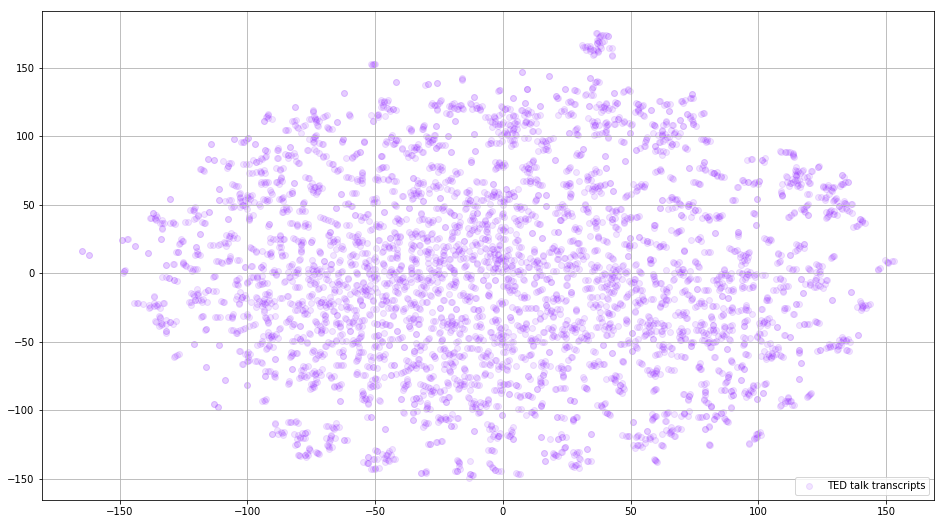

In [34]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
% matplotlib inline

words_ak = []
embeddings_ak = []
for word in list(w2v_model.wv.vocab):
    embeddings_ak.append(w2v_model.wv[word])
    words_ak.append(word)
    
tsne_ak_2d = TSNE(perplexity=5, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_ak_2d = tsne_ak_2d.fit_transform(embeddings_ak)

def tsne_plot_2d(label, embeddings, words=[], a=1):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, 1))
    x = embeddings[:,0]
    y = embeddings[:,1]
    plt.scatter(x, y, c=colors, alpha=a, label=label)
    for i, word in enumerate(words):
        plt.annotate(word, alpha=0.3, xy=(x[i], y[i]), xytext=(5, 2), 
                     textcoords='offset points', ha='right', va='bottom', size=10)
    plt.legend(loc=4)
    plt.grid(True)
    plt.savefig("hhh.png", format='png', dpi=150, bbox_inches='tight')
    plt.show()

tsne_plot_2d('TED talk transcripts', embeddings_ak_2d, a=0.1)

In [35]:
keys = ['food', 'economy', 'love', 'technology', 'happiness']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in w2v_model.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(w2v_model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


WARNING - 14:04:23: 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
WARNING - 14:04:23: 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
WARNING - 14:04:23: 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
WARNING - 14:04:23: 'c' argument looks like a single numeric RGB or RGBA sequence, which sh

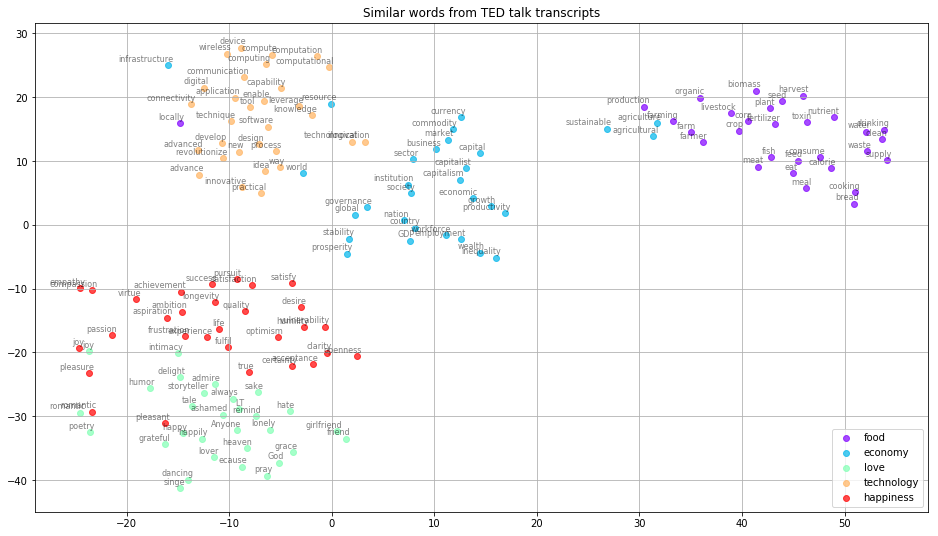

In [37]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=10, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)


import matplotlib.pyplot as plt
import matplotlib.cm as cm
% matplotlib inline


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words from TED talk transcripts', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

In [38]:
words_wp = []
embeddings_wp = []
for word in list(w2v_model.wv.vocab):
    embeddings_wp.append(w2v_model.wv[word])
    words_wp.append(word)

tsne_wp_3d = TSNE(perplexity=30, n_components=3, init='pca', n_iter=3500, random_state=12)
embeddings_wp_3d = tsne_wp_3d.fit_transform(embeddings_wp)

from mpl_toolkits.mplot3d import Axes3D


def tsne_plot_3d(title, label, embeddings, a=1):
    fig = plt.figure()
    ax = Axes3D(fig)
    colors = cm.rainbow(np.linspace(0, 1, 1))
    plt.scatter(embeddings[:, 0], embeddings[:, 1], embeddings[:, 2], c=colors, alpha=a, label=label)
    plt.legend(loc=4)
    plt.title(title)
    plt.show()


tsne_plot_3d('Visualizing Embeddings using t-SNE', 'TED talk scripts', embeddings_wp_3d, a=0.1)

KeyboardInterrupt: ignored

Save model to a txt-file

In [44]:
w2v_model.wv.save_word2vec_format('/content/drive/My Drive/Colab Notebooks/word2vec-50size.txt', binary=False)

INFO - 14:24:51: storing 4703x50 projection weights into /content/drive/My Drive/Colab Notebooks/word2vec-50size.txt
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


# Get already trained and saved model
Get the model you already saved 

In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:

from gensim.models import Word2Vec
model = Word2Vec.load("/content/drive/My Drive/Colab Notebooks/word2vec-50size.model")

INFO - 10:56:30: loading Word2Vec object from /content/drive/My Drive/Colab Notebooks/word2vec-50size.model
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
INFO - 10:56:30: loading wv recursively from /content/drive/My Drive/Colab Notebooks/word2vec-50size.model.wv.* with mmap=None
INFO - 10:56:30: setting ignored attribute vectors_norm to None
INFO - 10:56:30: loading vocabulary recursively from /content/drive/My Drive/Colab Notebooks/word2vec-50size.model.vocabulary.* with mmap=None
INFO - 10:56:30: loading trainables recursively from /content/drive/My Drive/Colab Notebooks/word2vec-50size.model.trainables.* with mmap=None
INFO - 10:56:30: setting ignored attribute cum_table to None


In [40]:
model.most_similar(positive=['inspiration'])

NameError: ignored

In [39]:
w2v_model.most_similar(positive=['marriage'], negative=['sex'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('peace', 0.5106731057167053),
 ('momentum', 0.436515748500824),
 ('mathematic', 0.4363335967063904),
 ('democracy', 0.4151648283004761),
 ('ideal', 0.3968181014060974),
 ('wisdom', 0.3967941999435425),
 ('adopt', 0.38139596581459045),
 ('liberty', 0.3772311806678772),
 ('power', 0.37664341926574707),
 ('philosophy', 0.3765433430671692)]